# U.S. Medical Insurance Costs

## Project Overview
For this project, you will be investigating a medical insurance costs dataset in a .csv file using the Python skills that you have developed. This dataset and its parameters will seem familiar if you have done any of the previous Python projects in the data science path.  
However, you are now tasked with working with the actual information in the dataset and performing your own independent analysis on real-world data! We will not be providing step-by-step instructions on what to do, but we will provide you with a framework to structure your exploration and analysis.

## Project Objectives
	- Work locally on your own computer
	- Import a dataset into your program
	- Analyze a dataset by building out functions or class methods
	- Use libraries to assist in your analysis
	- Optional: Document and organize your findings
    - Optional: Make predictions about a dataset’s features based on your findings!

## Project Expectations
For this project, we expect that you have a basic understanding of Python fundamentals, including how to use functions and/or classes as well as how to work with CSV files. The tasks and project solution code are tailored towards someone with this knowledge base.  
If you know Python libraries or skills that extend beyond this expectation (such as NumPy or pandas), you are encouraged to use them. This project is meant for you to show off your knowledge, so do not feel constrained by the tasks or hints written out.!

## Dataset provided
_file name_: "insurance.csv"
snapshot of the csv file:  
  
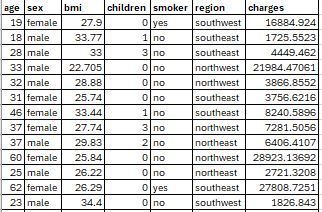
  
This csv table lists some patient information relevant to insurance companies.  
There are 7 columns, with numerical and categorical values and no missing data:  
- age: patient age (numerical: integer)
- sex: patient gender (categorical: "female" or "male")
- bmi:  patient body/mass index (BMI) (numerical: float)
- children: number of chidren raised by patient (numerical: integer)
- smoker: smoker status of patient (boolean: "yes" or "no")
- region: patient region of residence (categorical)
- charges: insurance cost of patient (numerical: float)  

__Note__: The "bmi" column contains BMI data. While insurance companies do use BMI in their calculations, and that is reflected in this project, BMI is not necessarily an accurate predictor of health. As data scientists, we should always be skeptical of quantitative measures like BMI that reduce complex phenomena to a single number.  

__MyNote__: There is no indexing columns or unique IDs column. I need to add one so that I can trace back to a particular patient.  

## Scoping project
Now that you have looked over your dataset, plan out what you want to analyze. What is it that you want to find out about this dataset? Based on the way information is organized, certain inspections may be easier to perform than others. As you map out the process, consider the scope of your analysis as well.  
Properly scoping your project will greatly benefit you; scoping creates structure while requiring you to think through your entire project before you begin. You should start by stating the goals for your project, then gathering the data, and considering the analytical steps required. A proper project scope can be a great road map for your project, but keep in mind that some down-stream tasks may become dead ends which will require adjustment to the scope.  

__HINT__:    
Some possible ideas for analysis are the following:
- Find out the average age of the patients in the dataset.
- Analyze where a majority of the individuals are from.
- Look at the different costs between smokers vs. non-smokers.
- Figure out what the average age is for someone who has at least one child in this dataset.  
Main components that you will want to include:  
- Goals
- Data
- Analysis  
These are just some ideas and we hope they give you a good starting point. As you think of ideas, also consider what the implications of some of the results would be. For example, we may find that this dataset is mainly composed of individuals who have children or that it is imbalanced in terms of representation of males vs. females. Taking information like this into consideration when looking at data can give you insight into potential use cases as well as where certain biases can impact results.  

__MyNote__:    
I think it'd be interesting to produce some summary statistics about the dataset we have as well as identifying outliers.  
Some visualisations such as PCA, box plots, histograms would be very helpful.  
It'd good to know which factors contribute most to the charges.

## My project

### Install and import relevant libraries

In [18]:
# task 1: install needed libraries not present in ananconda
#import sys  
#!{sys.executable} -m pip install --user pingouin # needed if the pingouin library is not readily available in Jupyter Notebook

# task 2: import libraries already installed
import pingouin as pg # if not already done 
import csv
import scipy.stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Import dataset using pandas

In [2]:
# task 2: creating a new variable called df & assigning CSV file to it. 
df = pd.read_csv("insurance.csv")  # if file in the same folder as code. 
print(df) # df dimensions: [1338 rows x 7 columns]
# this approach successfully imported the csv file as a dataframe and indexed the rows.

# task 3: displaying df information
df.info()

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    -----------

### Save your dataset via Python variables
Save the features of your dataset (the columns) from insurance.csv by storing them in variables that can be used for analysis.  
As you consider what types of variables to use and how many you plan to create, think ahead about the parameters you wish to investigate and how your organization will impact this analysis.

In [3]:
# task 1: add indexing column and create variables
df["Index"] = "ID" + (df.index + 1).astype(str) # adding an index as a unique identifier to the dataframe
age = df[["age"]]
sex = df[["sex"]]
bmi = df[["bmi"]]
children = df[["children"]]
smoker = df[["smoker"]]
region = df[["region"]]
charges = df[["charges"]]
index = df[["Index"]]

# task 2: checking variables
df.info()
print(df) # df dimensions: [1338 rows x 8 columns]. The "Index" column has been added at the end.
print(age)
print(sex)
print(bmi)
print(children)
print(smoker)
print(region)
print(charges)
print(index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
 7   Index     1338 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB
      age     sex     bmi  children smoker     region      charges   Index
0      19  female  27.900         0    yes  southwest  16884.92400     ID1
1      18    male  33.770         1     no  southeast   1725.55230     ID2
2      28    male  33.000         3     no  southeast   4449.46200     ID3
3      33    male  22.705         0     no  northwest  21984.47061     ID4
4      32    male  28.880         0     no  northwest   3866.85520

### Build out analysis functions or class methods
You now have everything you need to begin your analysis. You have organized the information from insurance.csv and have spent some time thinking about what it is you would like to investigate.  
Now is the time to build out how you perform these investigations. Use the Python fundamentals you have learned so far to accomplish these tasks. There are many different ways you can achieve these analyses. In our hint, we will provide some ideas for how you can use Python to analyze data.  
__HINT__:  
The two main options you have at your disposal are the following:  
- Build functions that perform each analysis you desire.
- Build a class that contains methods for your analysis.  
  
Both are excellent options and can produce clean, modular code.

#### Summary statistics

In [5]:
# task 1: count, averages, SDs, quartiles and min/max of quantitative variables (age, bmi, children, charges)
df.describe() # for numerical variables, the pandas .describe() method does it all in one command line.

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

__MyNote__:  
The summary statistics of quantitative variables are very helpful.  
In this dataset of 1338 patients, age varies from 18 to 64 and averages 39, BMI varies from 16.0 to 53.1, averages 30.7 and seldom exceeds 34.6, charges vary from 1122 to 63770 dollars, average 13270 and sledom exceed  $16640.   
Patients have from 0 to 5 children, with an average of 1; very few have more than 2 (as indicated by the 75% quartile).

In [6]:
# task 2: count, unique, top and frequencies of categorical variables (sex, smoker, region)
df.describe(include="object") # for categorcial variables use .describe(include="object")

sex smoker     region Index
count   1338   1338       1338  1338
unique     2      2          4  1338
top     male     no  southeast   ID1
freq     676   1064        364     1

__MyNote__:  
The summary statistics of categorical variables are not very helpful. Instead I will find another way.

In [7]:
# task 3: count and percentage of categorical variables (sex, smoker, region)
df0 = df[["sex","smoker","children","region"]]
df1 = df0.melt(value_name='v', var_name='c')
df2 = df1.groupby(['c', 'v']).size().reset_index(name='count')
df2['perc'] = df2['count'].div(df2.groupby('c')['count'].transform('sum')).mul(100)
print (df2)

           c          v  count       perc
0   children          0    574  42.899851
1   children          1    324  24.215247
2   children          2    240  17.937220
3   children          3    157  11.733931
4   children          4     25   1.868460
5   children          5     18   1.345291
6     region  northeast    324  24.215247
7     region  northwest    325  24.289985
8     region  southeast    364  27.204783
9     region  southwest    325  24.289985
10       sex     female    662  49.476831
11       sex       male    676  50.523169
12    smoker         no   1064  79.521674
13    smoker        yes    274  20.478326


__MyNote__:  
Those statistics are informative.  
The 1338 patients evenly represent gender with 49.5% women and 50.5% male, as well as US regions (24.% from nortwest, northeast and southwest, and 27.2% from southeast).   
However, there is an uneven distribution based on children with far more kidless patients (42.9%) thank patients with 1 or more children. The non-smokers (79.5%) largely outnumber the smokers (20.5%).

In [4]:
# task 4: using summary statistics function
import pandas as pd

def summary_statistics(df):
    """
    Calculate summary statistics for numerical columns in the DataFrame.
    """
    summary_stats = {}
    for column in df.select_dtypes(include=['int64', 'float64']):
        stats = {
            'mean': df[column].mean(),
            'median': df[column].median(),
            'std_dev': df[column].std(),
            'min': df[column].min(),
            'max': df[column].max()
        }
        summary_stats[column] = stats
    return summary_stats

# Example usage
summary_stats = summary_statistics(df)
print(summary_stats)

{'age': {'mean': 39.20702541106129, 'median': 39.0, 'std_dev': 14.049960379216172, 'min': 18, 'max': 64}, 'bmi': {'mean': 30.66339686098655, 'median': 30.4, 'std_dev': 6.098186911679017, 'min': 15.96, 'max': 53.13}, 'children': {'mean': 1.0949177877429, 'median': 1.0, 'std_dev': 1.2054927397819095, 'min': 0, 'max': 5}, 'charges': {'mean': 13270.422265141257, 'median': 9382.033, 'std_dev': 12110.011236693994, 'min': 1121.8739, 'max': 63770.42801}}


__MyNote:__  
This function iterates over each numerical column in the DataFrame, calculates statistics such as mean, median, standard deviation, minimum, and maximum, and stores the results in a dictionary.

#### Plotting the summary statistics

<Figure size 100x100 with 0 Axes>

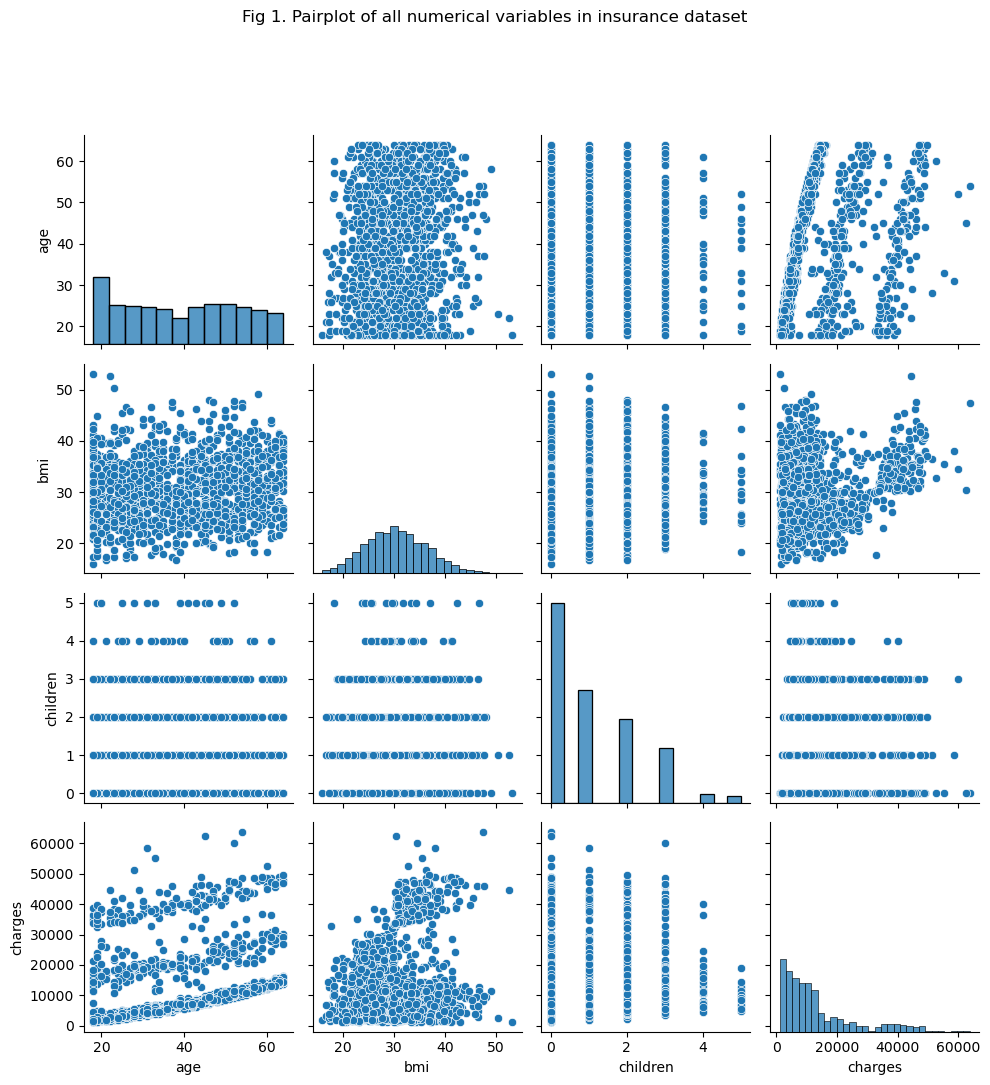

In [69]:
# task 1: importing the seaborn and matplotlib libraries
#import seaborn as sns # if not already done  
#import matplotlib.pyplot as plt # if not already done  

# task 2: visualising numerical variables
df3 = df[["age","bmi","children","charges"]]
fig1=plt.figure(figsize=(1,1), layout='constrained')
fig1=sns.pairplot(df3)
fig1.fig.suptitle("Fig 1. Pairplot of all numerical variables in insurance dataset", y=1.08) # y= some height>1
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

<Figure size 100x100 with 0 Axes>

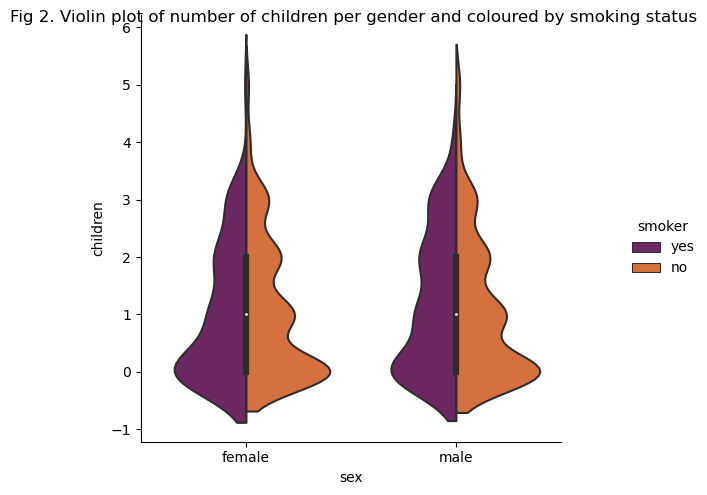

<Figure size 100x100 with 0 Axes>

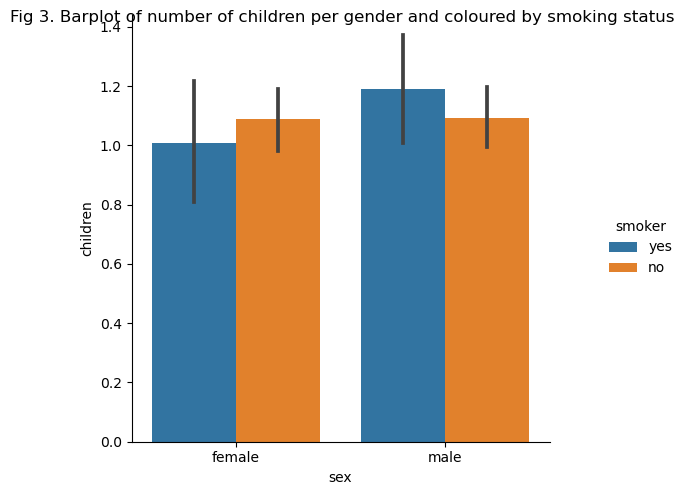

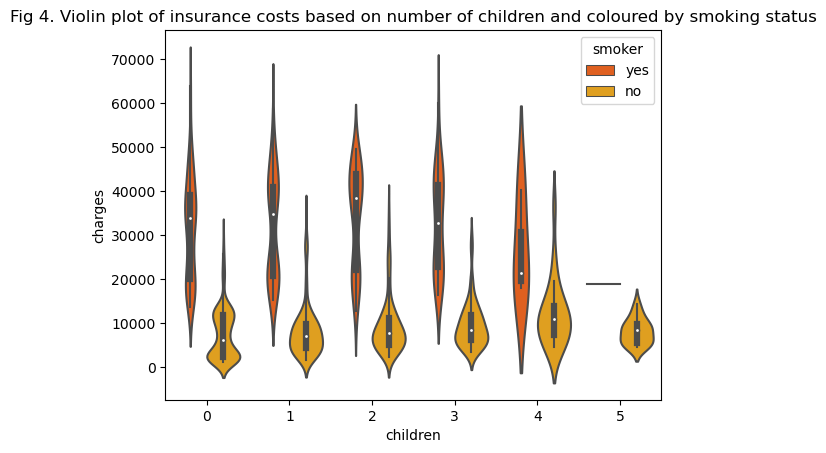

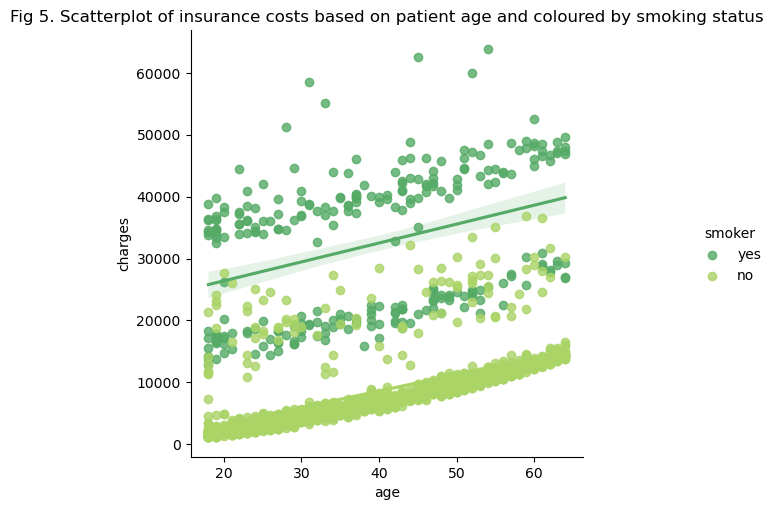

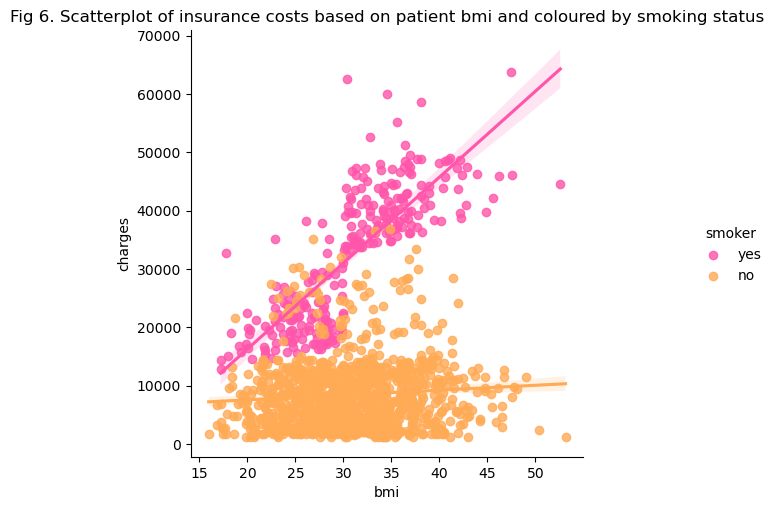

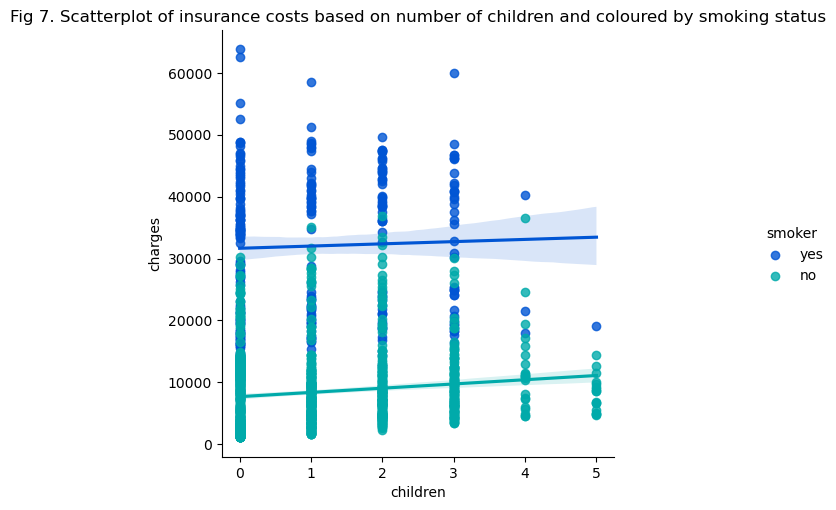

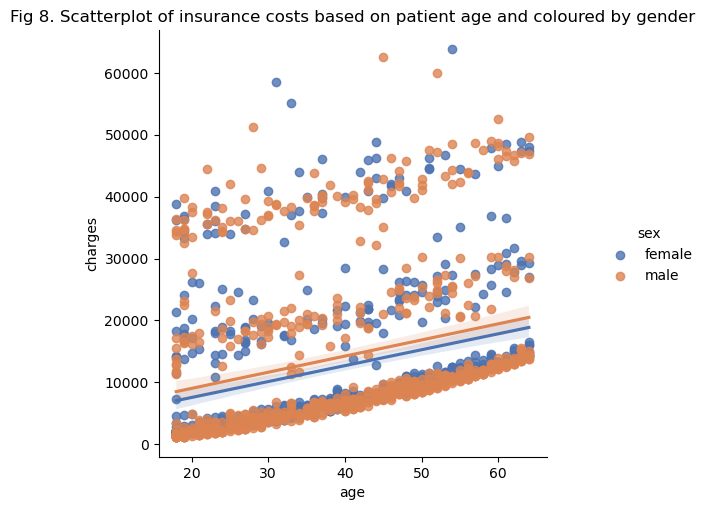

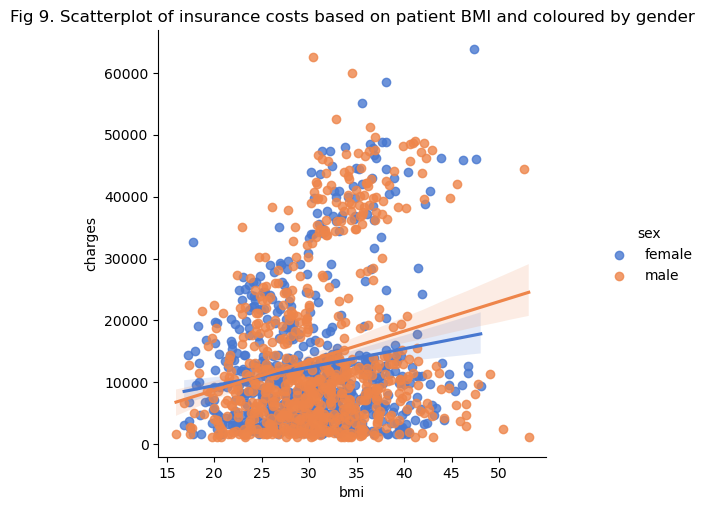

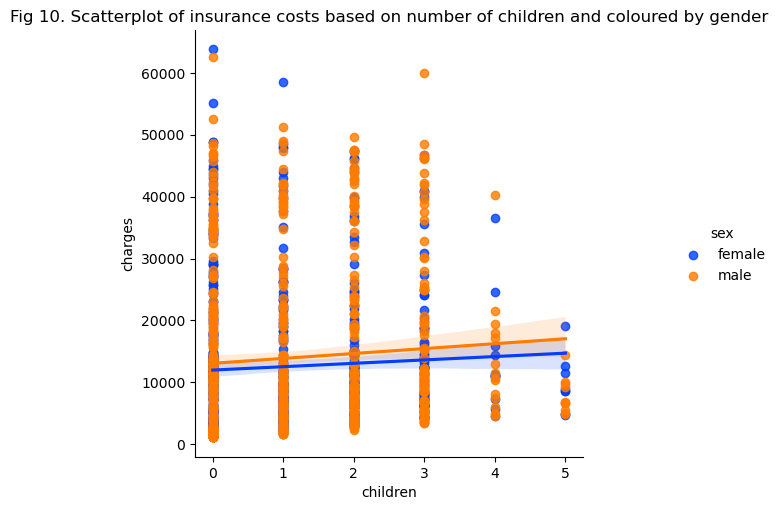

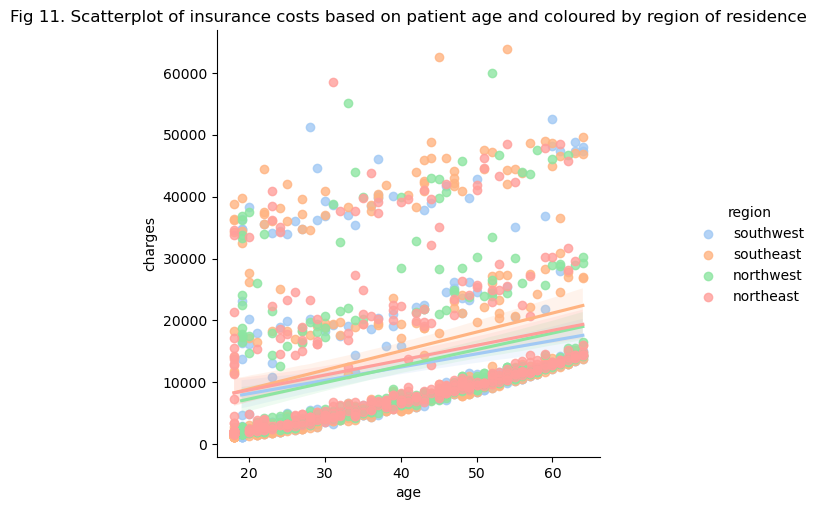

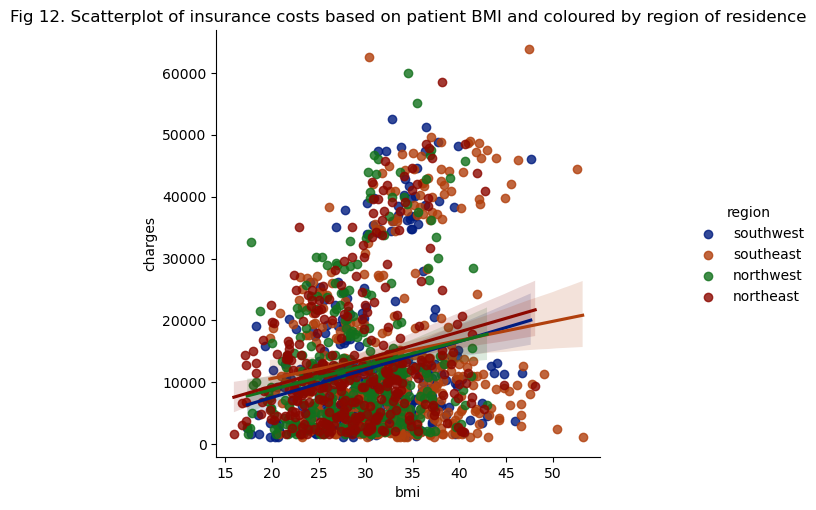

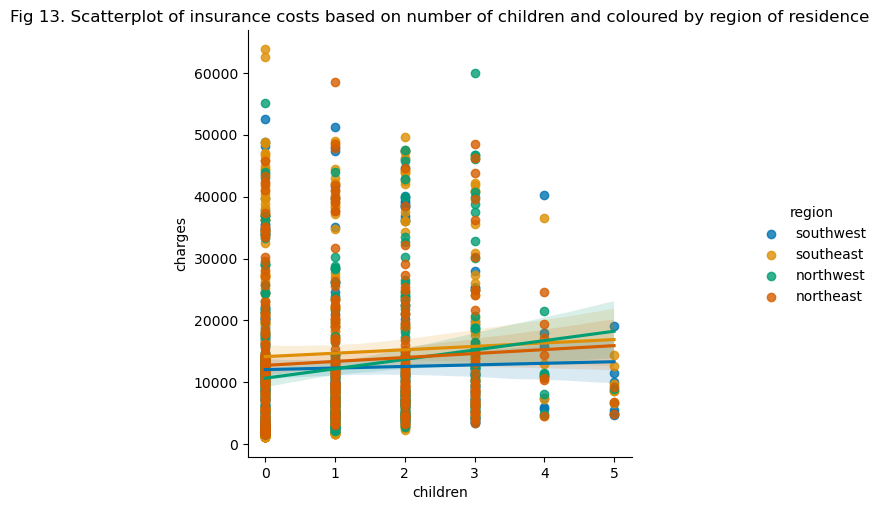

In [73]:
# task 3: visualising categorical variables
#df0 = df[["sex","smoker","children","region"]]
#sns.catplot(df, x="sex", y="children", hue="smoker", kind="swarm", size = 2) # not particularly informative
plt.tight_layout()
plt.show()
fig2=plt.figure(figsize=(1,1), layout='constrained')
fig2=sns.catplot(df, x="sex", y="children", hue="smoker", kind="violin", split = True, palette='inferno')
fig2.fig.suptitle('Fig 2. Violin plot of number of children per gender and coloured by smoking status')
plt.show()
fig3=plt.figure(figsize=(1,1), layout='constrained')
fig3=sns.catplot(df, x="sex", y="children", hue="smoker", kind="bar")
fig3.fig.suptitle('Fig 3. Barplot of number of children per gender and coloured by smoking status')
plt.show()
fig4 = sns.violinplot(x = 'children', y = 'charges', data=df, orient='v', hue='smoker', palette='autumn')
fig4.set_title('Fig 4. Violin plot of insurance costs based on number of children and coloured by smoking status')
plt.show()  
fig5 = sns.lmplot(x='age', y='charges',data=df, hue='smoker',palette='summer')
ax = plt.gca()
ax.set_title('Fig 5. Scatterplot of insurance costs based on patient age and coloured by smoking status')
plt.show() 
fig6 = sns.lmplot(x='bmi', y='charges',data=df, hue='smoker',palette='spring')
ax = plt.gca()
ax.set_title('Fig 6. Scatterplot of insurance costs based on patient bmi and coloured by smoking status')
plt.show() 
fig7 = sns.lmplot(x='children', y='charges',data=df, hue='smoker',palette='winter')
ax = plt.gca()
ax.set_title('Fig 7. Scatterplot of insurance costs based on number of children and coloured by smoking status')
plt.show() 
fig8 = sns.lmplot(x='age', y='charges',data=df, hue='sex',palette='deep')
ax = plt.gca()
ax.set_title('Fig 8. Scatterplot of insurance costs based on patient age and coloured by gender')
plt.show() 
fig9 = sns.lmplot(x='bmi', y='charges',data=df, hue='sex',palette='muted')
ax = plt.gca()
ax.set_title('Fig 9. Scatterplot of insurance costs based on patient BMI and coloured by gender')
plt.show() 
fig10 = sns.lmplot(x='children', y='charges',data=df, hue='sex',palette='bright')
ax = plt.gca()
ax.set_title('Fig 10. Scatterplot of insurance costs based on number of children and coloured by gender')
plt.show() 
fig11 = sns.lmplot(x='age', y='charges',data=df, hue='region',palette='pastel')
ax = plt.gca()
ax.set_title('Fig 11. Scatterplot of insurance costs based on patient age and coloured by region of residence')
plt.show() 
fig12 = sns.lmplot(x='bmi', y='charges',data=df, hue='region',palette='dark')
ax = plt.gca()
ax.set_title('Fig 12. Scatterplot of insurance costs based on patient BMI and coloured by region of residence')
plt.show() 
fig13 = sns.lmplot(x='children', y='charges',data=df, hue='region',palette='colorblind')
ax = plt.gca()
ax.set_title('Fig 13. Scatterplot of insurance costs based on number of children and coloured by region of residence')
plt.show() 

#### Detecting biases

In [5]:
# task 1: using frequency function
def detect_biases_categorical(df):
    """
    Detect biases in categorical columns by counting the frequency of each category.
    """
    biases = {}
    for column in df.select_dtypes(include=['object']):
        category_counts = df[column].value_counts(normalize=True)
        biases[column] = category_counts
    return biases

# Example usage
categorical_biases = detect_biases_categorical(df)
print(categorical_biases)

{'sex': sex
male      0.505232
female    0.494768
Name: proportion, dtype: float64, 'smoker': smoker
no     0.795217
yes    0.204783
Name: proportion, dtype: float64, 'region': region
southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: proportion, dtype: float64, 'Index': Index
ID1       0.000747
ID899     0.000747
ID897     0.000747
ID896     0.000747
ID895     0.000747
            ...   
ID446     0.000747
ID445     0.000747
ID444     0.000747
ID443     0.000747
ID1338    0.000747
Name: proportion, Length: 1338, dtype: float64}


__MyNote:__  
This function iterates over each categorical column in the DataFrame, calculates the frequency of each category, and stores the results in a dictionary.   
The normalized counts allow you to compare the proportions of different categories within each column.

In [19]:
# task 2: using a combination of 2 variables function
from scipy.stats import chi2_contingency

def detect_biases_combinations(df, columns):
    """
    Detect biases by analyzing combinations of categorical variables.
    """
    biases = {}

    # Generate combinations of columns
    from itertools import combinations
    column_combinations = list(combinations(columns, 2))

    # Iterate over column combinations
    for combo in column_combinations:
        col1, col2 = combo
        cross_tab = pd.crosstab(df[col1], df[col2])

        # Compute chi-square statistic and p-value
        chi2_stat, p_val, _, _ = chi2_contingency(cross_tab)

        # Check for significant differences in distributions
        biased_cols = []
        for index, row in cross_tab.iterrows():
            if (row.max() - row.min()) >= 0.1 and p_val < 0.05:  # Adjust threshold as needed
                biased_cols.append(index)

        if biased_cols:
            biases[combo] = {'biased_categories': biased_cols, 'chi2_statistic': chi2_stat, 'p_value': p_val}

    return biases

# Example usage
columns = ['sex', 'region', 'smoker']
combination_biases = detect_biases_combinations(df, columns)
print(combination_biases)

{('sex', 'smoker'): {'biased_categories': ['female', 'male'], 'chi2_statistic': 7.39291081459996, 'p_value': 0.006548143503580696}}


__MyNote:__  
Considering a combination of variables instead of analyzing them independently can provide more insights into potential biases in the dataset. Task 2 function identifies biases by analyzing combinations of categorical variables.  
In this function, we first generate combinations of categorical columns using itertools.combinations. Then, for each combination, we compute a contingency table using pd.crosstab to analyze the distribution of one variable within the categories of another variable. We then check for significant differences in distributions and identify combinations where such differences exist.  
Adjust the threshold (0.1 in the example) based on your dataset and domain knowledge to determine what constitutes a significant difference in distributions. You can also customize the function to include more than two columns in each combination if needed.  
This approach allows you to identify biases that may not be apparent when analyzing individual variables alone but become evident when considering their interactions.  
To provide more insights and interpret the biases detected, we can calculate statistics such as chi-square statistic and p-value for each combination. These statistics can help assess the significance of the differences in distributions.
We calculate the chi-square statistic and p-value for each combination of categorical variables using chi2_contingency from scipy.stats.  
We check for significant differences in distributions based on both the difference in proportions and the p-value (using a significance level of 0.05).  
We store the biased categories, chi-square statistic, and p-value in the dictionary for each combination.
By considering both the difference in distributions and the statistical significance, you can better interpret the biases detected and assess their practical importance in the dataset. Adjust the threshold and significance level as needed based on your specific requirements and domain knowledge.  

#### Exploring correlations

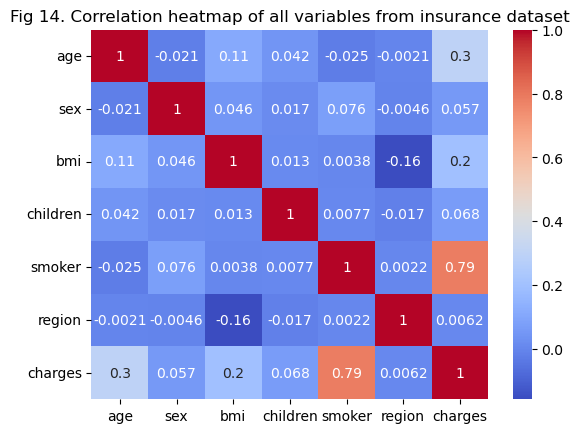

<Figure size 100x100 with 0 Axes>

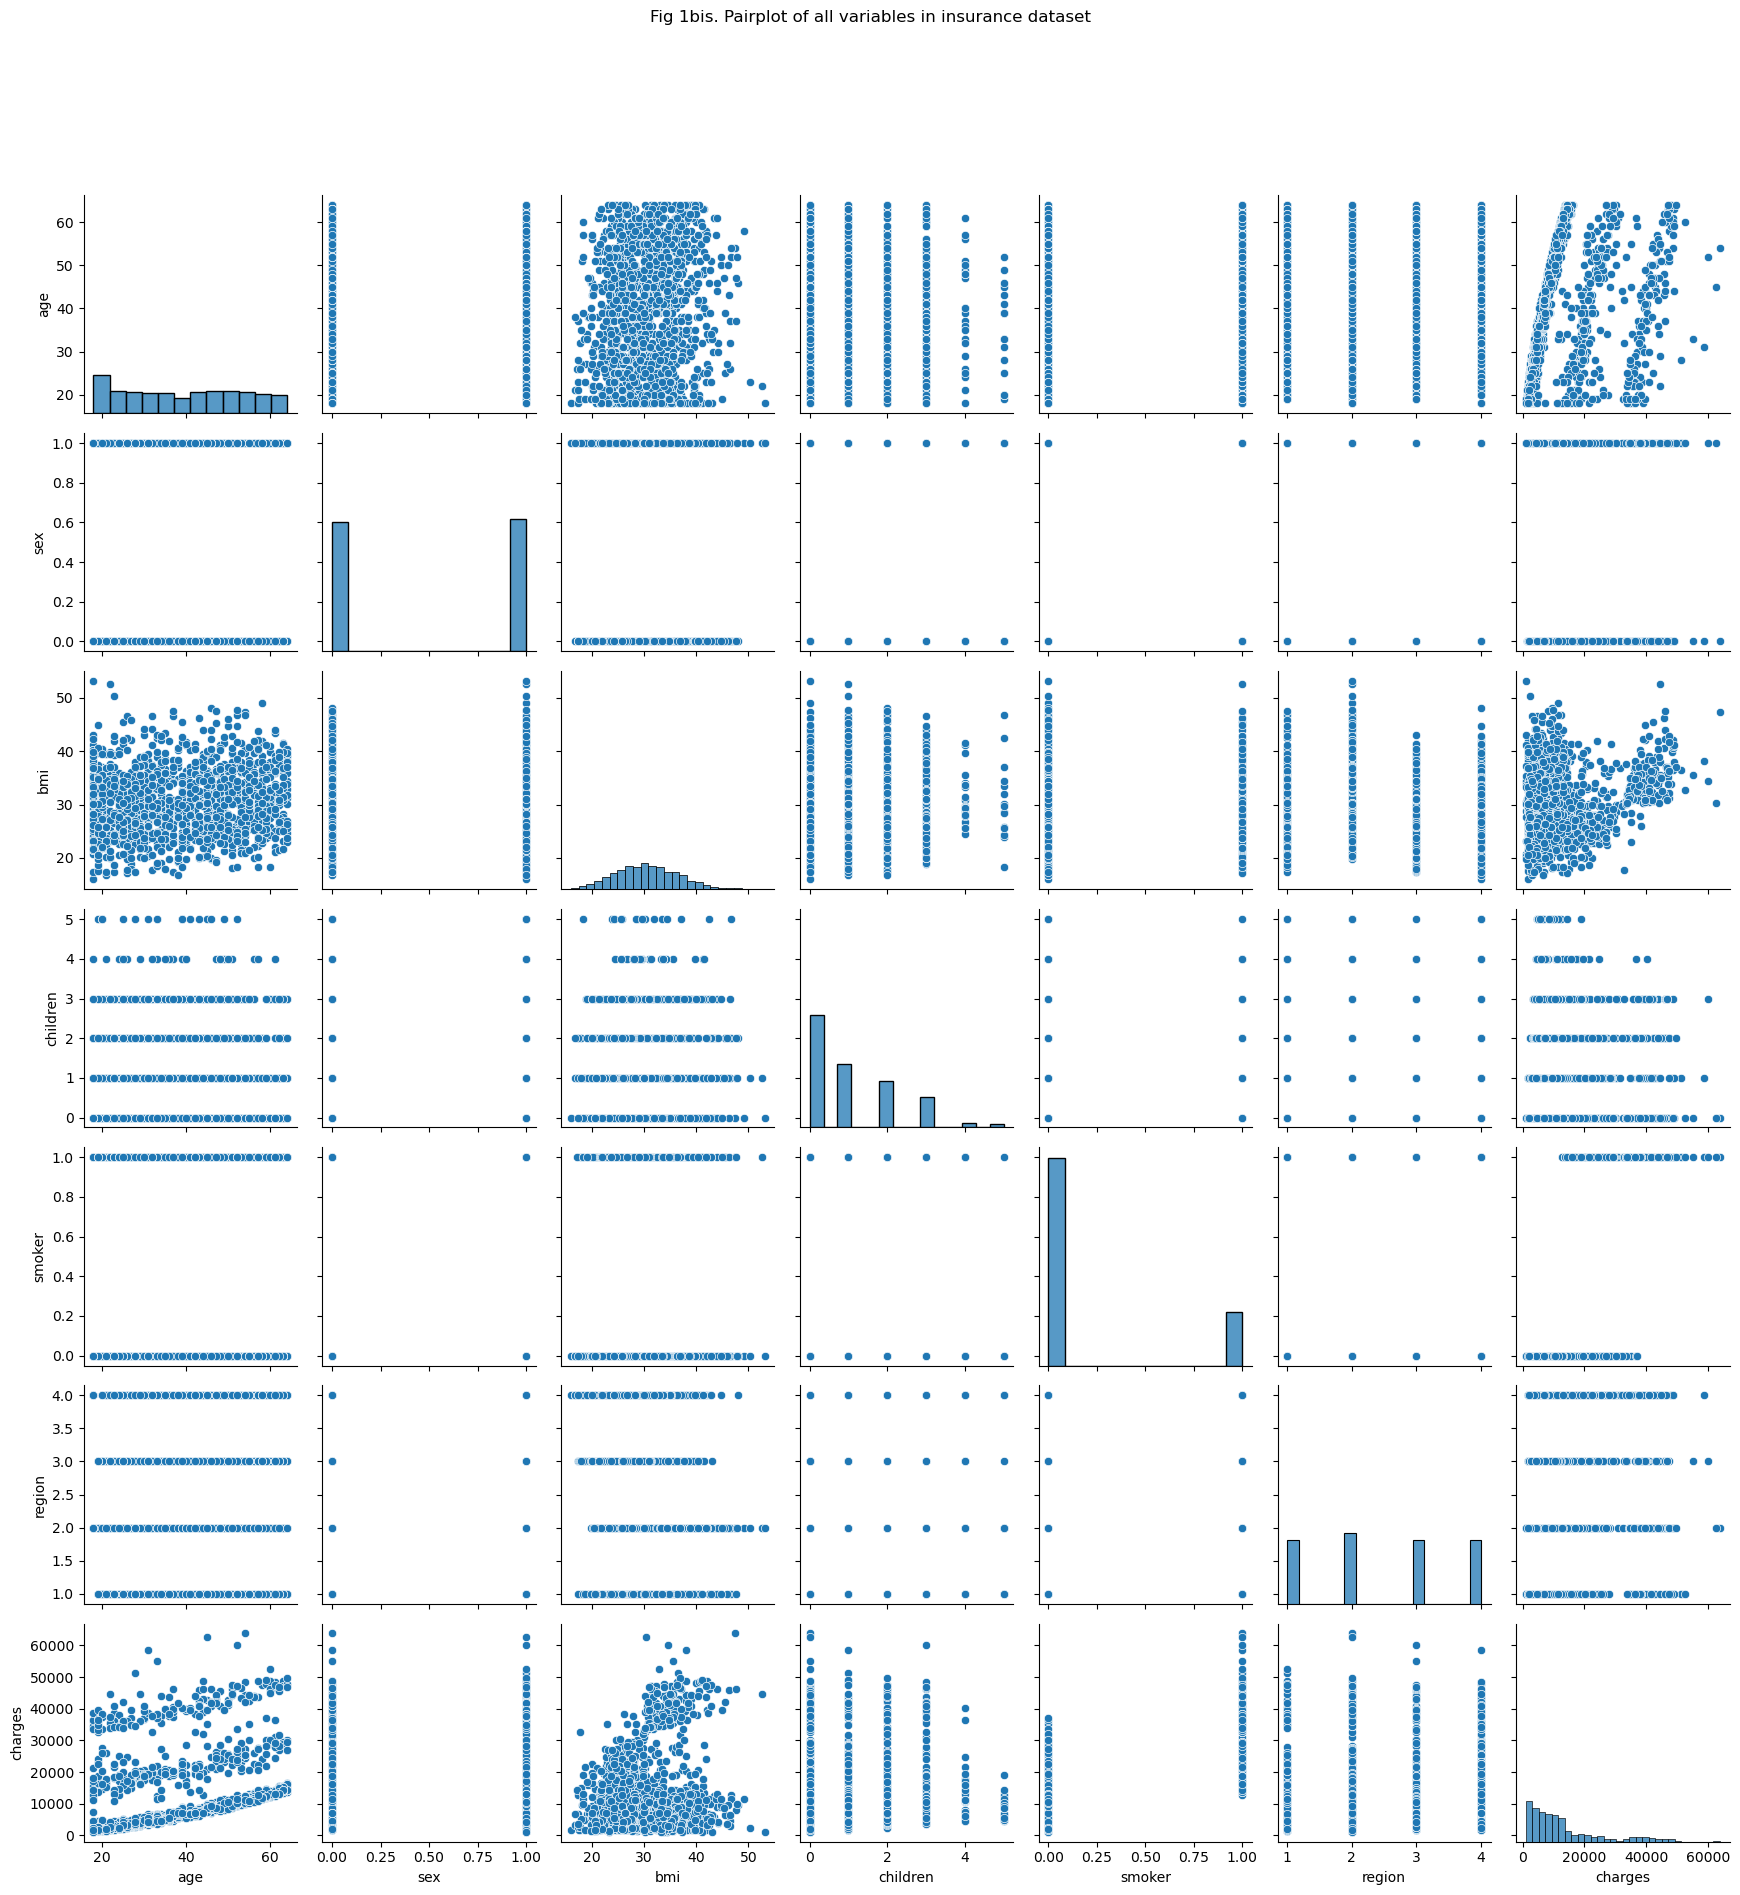

In [70]:
# task 1: converting categorical variables (sex, smoker, region, ) into numerical variables
df4 = df[['age','sex','bmi','children','smoker','region','charges']]
df4['sex'].replace(['female', 'male'], [0, 1], inplace=True)
df4['smoker'].replace(['no', 'yes'], [0, 1], inplace=True)
df4['region'].replace(['southwest', 'southeast', 'northwest', 'northeast'], [1,2,3,4], inplace=True)
#print(df4)

# task2: correlation between
corr_matrix = df4.corr()
fig14 = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
fig14.set_title('Fig 14. Correlation heatmap of all variables from insurance dataset')
plt.show()

# replotting the multicharts following conversion to numerical variables
fig1bis=plt.figure(figsize=(1,1), layout='constrained')
fig1bis=sns.pairplot(df4)
fig1bis.fig.suptitle("Fig 1bis. Pairplot of all variables in insurance dataset", y=1.08) # y= some height>1
plt.tight_layout()
plt.show()

__MyNote__:  
Anything less than abs(0.5) is deemed as not correlated.   
There is overall very little correlation between variables, with the exception of smoker status which heavily impacts insuarnce costs (strong positive correlation r2 = 0.79).   
The boxplot below shows that smoking incurs far greater charges than non-smoking.   
However, there are a few non smokers with high charges therefore other factors impact inusrance costs. 

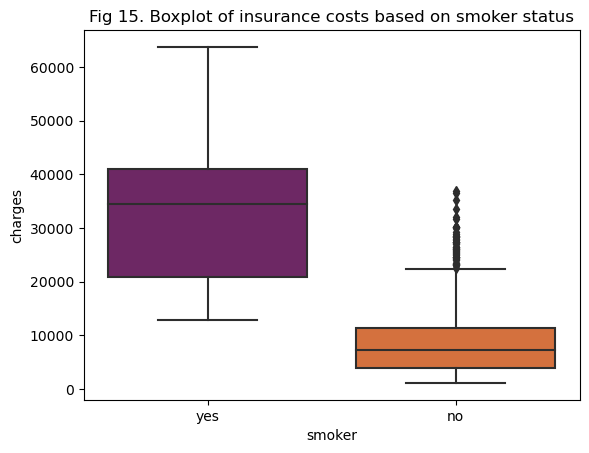

In [74]:
# task 3: visualising the effect of smoking on charges
fig15 = sns.boxplot(x='smoker', y='charges', data=df, palette='inferno')
fig15.set_title('Fig 15. Boxplot of insurance costs based on smoker status')
plt.show()

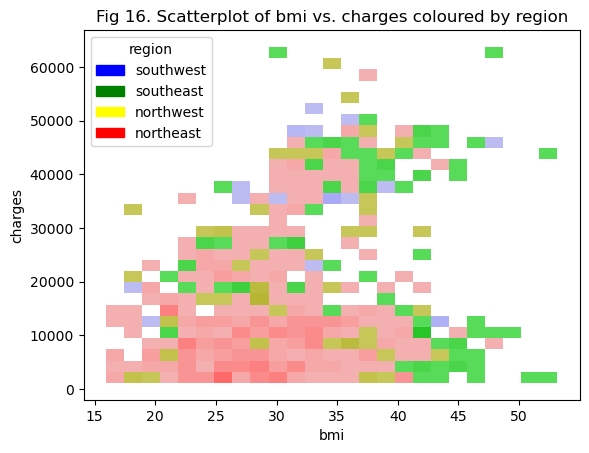

In [75]:
# task 4: visualising the effect of bmi and regions on charges
fig16 = sns.histplot(x='bmi', y='charges', data=df, hue = 'region', palette = ['blue','green','yellow','red'])
fig16.set_title('Fig 16. Scatterplot of bmi vs. charges coloured by region')
sns.move_legend(fig16, "upper left")
plt.show()

#### PCA using charges as the descriptive variable and age, sex, children, bmi, region, smoker as explanatory variables

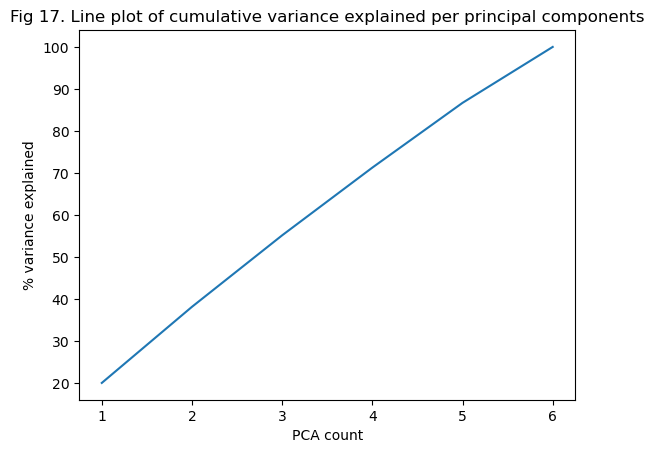

In [78]:
# Naming the features
features =  df4.drop("charges",axis=1) # df4 only contains numerical variables

# Separating out the features
x =  features.values

# Separating out the target
y = df4["charges"].values

# Standardizing the features
x= StandardScaler().fit_transform(x)

# Determining principal components
pca = PCA(n_components=6)
x= pca.fit_transform(x)
principalDf = pd.DataFrame(data =x
             , columns = ["principal_component1","principal_component2","principal_component3","principal_component4","principal_component5","principal_component6"])

principal_components = np.arange(1,len(pca.explained_variance_ratio_)+1)
variance_explained = np.cumsum(np.around(pca.explained_variance_ratio_*100,decimals=1))

fig17 = sns.lineplot(x='PCA count',y='% variance explained',
             data=pd.DataFrame({ 'PCA count': principal_components,
                 '% variance explained':variance_explained}))
fig17.set_title('Fig 17. Line plot of cumulative variance explained per principal components')
plt.show()

In [14]:
# Final DF
finalDf = pd.concat([principalDf,df4[["charges"]]], axis = 1)
finalDf.head()

principal_component1  principal_component2  principal_component3  \
0              0.413805              1.119147             -1.784825   
1             -0.122760              0.822142             -1.004169   
2             -0.624424              0.637478              0.557885   
3              1.363097              0.427586             -0.428150   
4              0.692600              0.451383             -0.604048   

   principal_component4  principal_component5  principal_component6  \
0              0.684093              2.149239             -0.339151   
1              0.832861             -1.139038              0.533472   
2              1.541617             -1.059054              0.326145   
3             -0.418729             -1.094912             -0.762747   
4             -0.532564             -1.138595             -0.031141   

       charges  
0  16884.92400  
1   1725.55230  
2   4449.46200  
3  21984.47061  
4   3866.85520

In [15]:
# compute eigenvalues in percent
eigenvalues = pca.explained_variance_ratio_ * 100
print(eigenvalues)

[20.06030916 18.13664023 16.99231368 16.08770233 15.39942441 13.32361019]


In [20]:
# merging PCA output to initial dataframe for plotting purpose
df5 = pd.merge(df, finalDf)
print(df5)

# saving merged table as a csv
df5.to_csv("insurance_PCA.csv", sep=',')

      age     sex     bmi  children smoker     region      charges   Index  \
0      19  female  27.900         0    yes  southwest  16884.92400     ID1   
1      18    male  33.770         1     no  southeast   1725.55230     ID2   
2      28    male  33.000         3     no  southeast   4449.46200     ID3   
3      33    male  22.705         0     no  northwest  21984.47061     ID4   
4      32    male  28.880         0     no  northwest   3866.85520     ID5   
...   ...     ...     ...       ...    ...        ...          ...     ...   
1335   50    male  30.970         3     no  northwest  10600.54830  ID1334   
1336   18  female  31.920         0     no  northeast   2205.98080  ID1335   
1337   18  female  36.850         0     no  southeast   1629.83350  ID1336   
1338   21  female  25.800         0     no  southwest   2007.94500  ID1337   
1339   61  female  29.070         0    yes  northwest  29141.36030  ID1338   

      principal_component1  principal_component2  principal_com

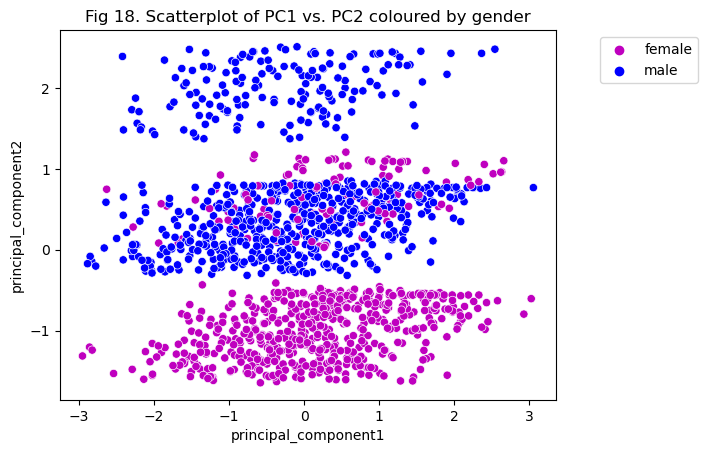

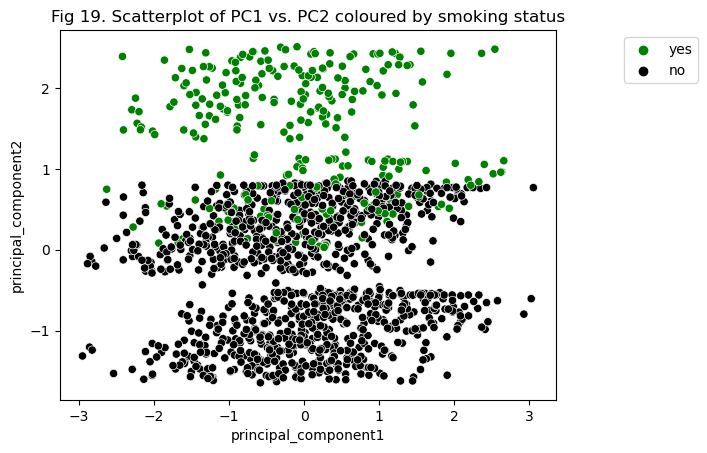

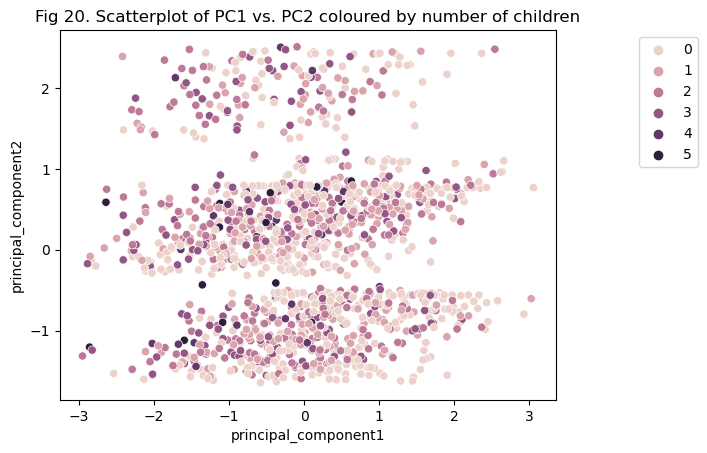

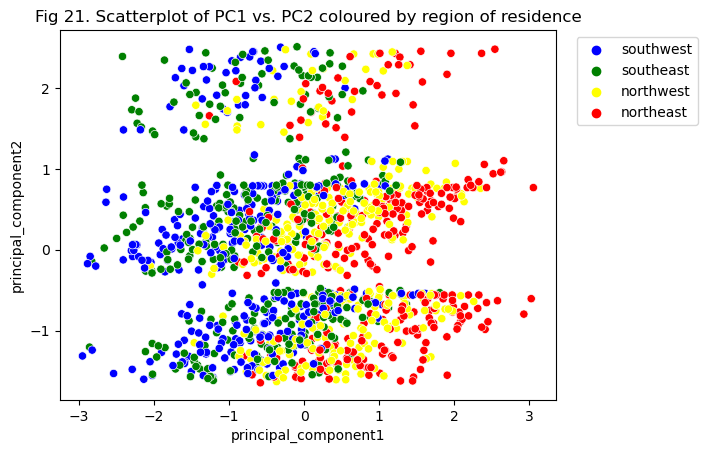

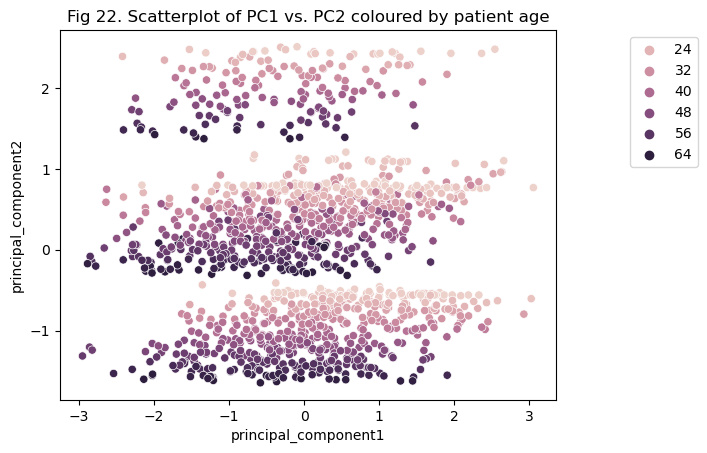

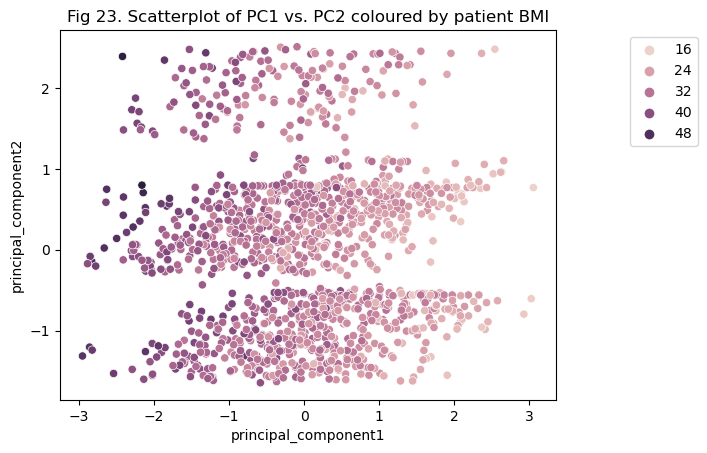

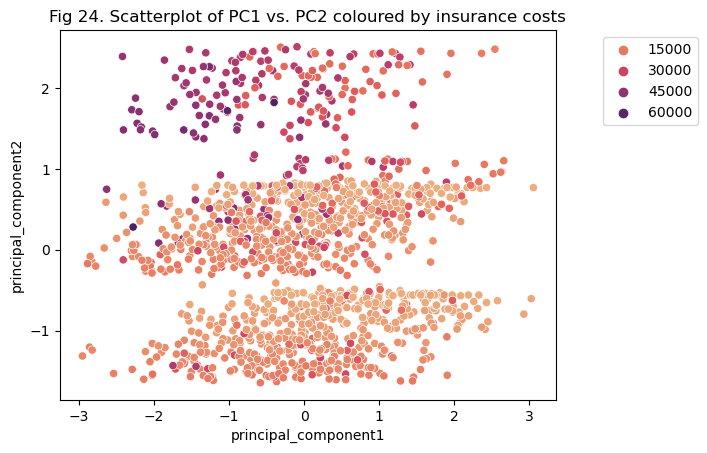

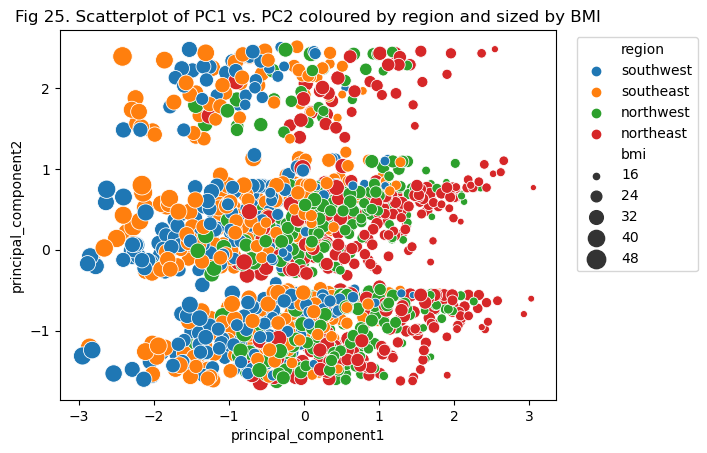

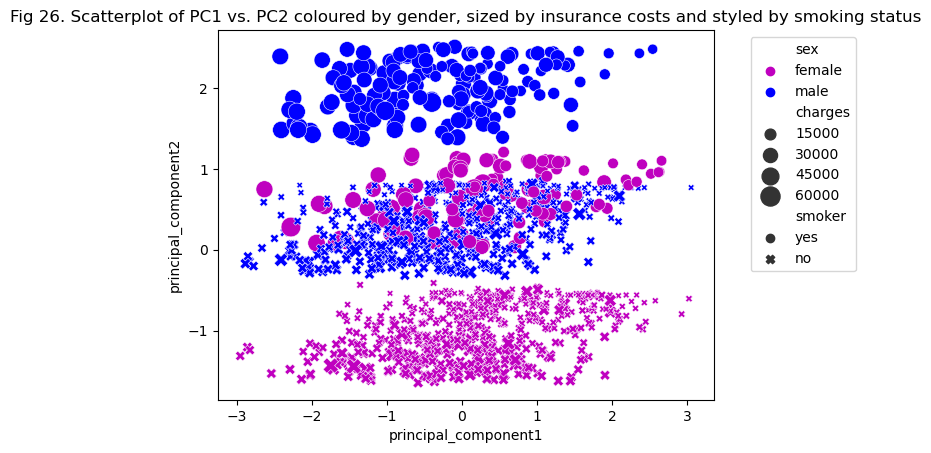

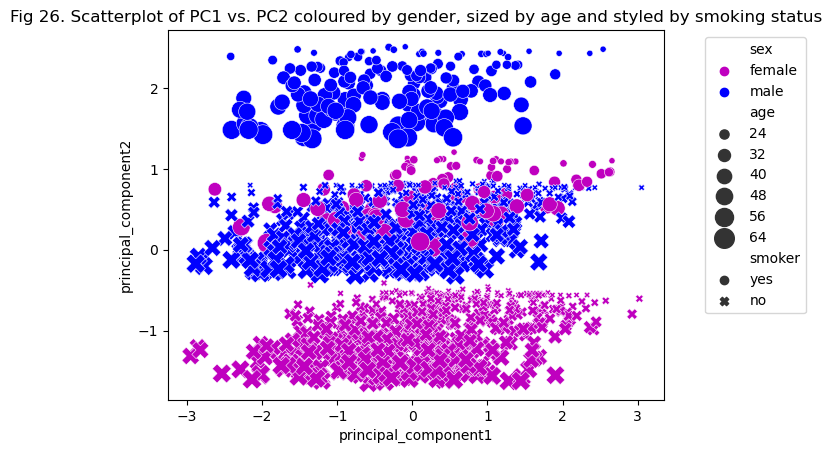

In [98]:
# plot PCA
fig18 = sns.scatterplot(x='principal_component1',y='principal_component2', data=df5, hue = 'sex', palette = ['m','b']) # sex explains PC2
fig18.set_title('Fig 18. Scatterplot of PC1 vs. PC2 coloured by gender')
fig18.legend(loc='upper right', bbox_to_anchor=(1.3, 1), ncol=1)
plt.show()
fig19 = sns.scatterplot(x='principal_component1',y='principal_component2', data=df5, hue = 'smoker', palette = ['g','k']) # smoker status explains PC2
fig19.set_title('Fig 19. Scatterplot of PC1 vs. PC2 coloured by smoking status')
fig19.legend(loc='upper right', bbox_to_anchor=(1.3, 1), ncol=1)
plt.show()
fig20 = sns.scatterplot(x='principal_component1',y='principal_component2', data=df5, hue = 'children', ) # the umber of children doesn't contribute to the data distribution
fig20.set_title('Fig 20. Scatterplot of PC1 vs. PC2 coloured by number of children')
fig20.legend(loc='upper right', bbox_to_anchor=(1.3, 1), ncol=1)
plt.show()
fig21 = sns.scatterplot(x='principal_component1',y='principal_component2', data=df5, hue = 'region', palette = ['blue','green','yellow','red']) # regions explain PC1
fig21.set_title('Fig 21. Scatterplot of PC1 vs. PC2 coloured by region of residence')
fig21.legend(loc='upper right', bbox_to_anchor=(1.3, 1), ncol=1)
plt.show()
fig22 = sns.scatterplot(x='principal_component1',y='principal_component2', data=df5, hue = 'age') # age explains PC2 with a gradient in each of the 3 clusters
fig22.set_title('Fig 22. Scatterplot of PC1 vs. PC2 coloured by patient age')
fig22.legend(loc='upper right', bbox_to_anchor=(1.3, 1), ncol=1)
plt.show()
fig23 = sns.scatterplot(x='principal_component1',y='principal_component2', data=df5, hue = 'bmi') # bmi explains PC1
fig23.set_title('Fig 23. Scatterplot of PC1 vs. PC2 coloured by patient BMI')
fig23.legend(loc='upper right', bbox_to_anchor=(1.3, 1), ncol=1)
plt.show()
fig24 = sns.scatterplot(x='principal_component1',y='principal_component2', data=df5, hue = 'charges', palette = 'flare') # charges explains PC2
fig24.set_title('Fig 24. Scatterplot of PC1 vs. PC2 coloured by insurance costs')
fig24.legend(loc='upper right', bbox_to_anchor=(1.3, 1), ncol=1)
plt.show()
fig25 = sns.scatterplot(x='principal_component1',y='principal_component2', data=df5, hue = 'region', size = 'bmi', sizes=(20, 200), legend = 'brief') # charges explains PC2
fig25.set_title('Fig 25. Scatterplot of PC1 vs. PC2 coloured by region and sized by BMI')
fig25.legend(loc='upper right', bbox_to_anchor=(1.3, 1), ncol=1)
plt.show()
fig26 = sns.scatterplot(x='principal_component1',y='principal_component2', data=df5, hue = 'sex', palette = ('m','b'), size = 'charges', sizes=(20, 200), style = 'smoker', legend = 'brief') # charges explains PC2
fig26.set_title('Fig 26. Scatterplot of PC1 vs. PC2 coloured by gender, sized by insurance costs and styled by smoking status')
fig26.legend(loc='upper right', bbox_to_anchor=(1.3, 1), ncol=1)
plt.show()
fig27 = sns.scatterplot(x='principal_component1',y='principal_component2', data=df5, hue = 'sex', palette = ('m','b'), size = 'age', sizes=(20, 200), style = 'smoker', legend = 'brief') # charges explains PC2
fig27.set_title('Fig 26. Scatterplot of PC1 vs. PC2 coloured by gender, sized by age and styled by smoking status')
fig27.legend(loc='upper right', bbox_to_anchor=(1.3, 1), ncol=1)
plt.show()

__MyNote__:  
The PCA biplot of PC1xPC2 shows 3 groups of datapoints across both PC2.   
Colouring the datapoints according to variables other than charges shows that PC1 (variance = 20%) is explained by regions and BMI (Fig. 25) while PC2 (variance = 18%) is explained by sex, smoker status, age and charges (Fig 26 and 27).   
That means that regions and BMI are not independent (not orthogonal); likewise, sex, smoker status, age and charges are not independant. The number of children is the only descriptive variable that does not contribute to the PCA.

#### Testing effect of descriptive variables on insurance costs
##### 1/ Using linear models

In [21]:
# task 1: run one-factor anova
model1 = pg.anova(dv="charges", between="sex", data=df)
print(round(model1, 2))
model2 = pg.anova(dv="charges", between="smoker", data=df)
print(round(model2, 2))
model3 = pg.anova(dv="charges", between="children", data=df)
print(round(model3, 2))
model4 = pg.anova(dv="charges", between="region", data=df)
print(round(model4, 2))
model5 = pg.anova(dv="charges", between="bmi", data=df)
print(round(model5, 2))
model6 = pg.anova(dv="charges", between="age", data=df)
print(round(model6, 2))

  Source  ddof1  ddof2    F  p-unc  np2
0    sex      1   1336  4.4   0.04  0.0
   Source  ddof1  ddof2        F  p-unc   np2
0  smoker      1   1336  2177.61    0.0  0.62
     Source  ddof1  ddof2    F  p-unc   np2
0  children      5   1332  3.3   0.01  0.01
   Source  ddof1  ddof2     F  p-unc   np2
0  region      3   1334  2.97   0.03  0.01
  Source  ddof1  ddof2     F  p-unc   np2
0    bmi    547    790  1.11   0.08  0.44
  Source  ddof1  ddof2     F  p-unc   np2
0    age     46   1291  3.97    0.0  0.12


__MyNote__:
The one-way ANOVA models indicate that smoker, children, and age are the variable significantly (p-value < 0.1) affecting the insurance costs.

In [104]:
# task 2: run multifactorial anova in pg
#fullmodel = pg.anova(dv="charges", between=["sex", "smoker", "region", "children", "age", "bmi"], data=df4, detailed=True)
#round(fullmodel, 6) # cannot run as it triggers a MemoryError: Unable to allocate 24.6 GiB for an array with shape (1338, 2472576) and data type float64

model7 = pg.anova(dv="charges", between=["sex", "smoker", "bmi"], data=df4, detailed=True)
round(model7, 3)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 547, but rank is 115
  warnings.warn('covariance of constraints does not have full '
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 547, but rank is 221
  warnings.warn('covariance of constraints does not have full '
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 547, but rank is 401
  warnings.warn('covariance of constraints does not have full '
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 547, but rank is 1
  warnings.warn('covariance of constraints does no

Source            SS     DF            MS             F  p-unc  \
0                 sex -6.160675e+16    1.0 -6.160675e+16 -1.636299e+09   1.00   
1              smoker  5.700358e+17    1.0  5.700358e+17  1.514037e+10   0.00   
2                 bmi  3.401310e+16  547.0  6.218116e+13  1.651556e+06   0.00   
3        sex * smoker  4.790436e+16    1.0  4.790436e+16  1.272358e+09   0.00   
4           sex * bmi  1.315609e+16  547.0  2.405135e+13  6.388132e+05   0.00   
5        smoker * bmi  2.666660e+15  547.0  4.875065e+12  1.294836e+05   0.00   
6  sex * smoker * bmi  3.503338e+09  547.0  6.404640e+06  1.700000e-01   0.68   
7            Residual  1.554947e+10  413.0  3.765006e+07           NaN    NaN   

     np2  
0  1.000  
1  1.000  
2  1.000  
3  1.000  
4  1.000  
5  1.000  
6  0.184  
7    NaN

__MyNote__:  
Linear model 7 informs us that the only significant variables (p<0.01) are the smoking status (uncorrected p-value (uncp) = 0), BMI (uncp = 0), the interaction smoker * sex (uncp = 0), the interaction sex * bmi (uncp = 0), and the interaction smoker * bmi (uncp = 0).

In [20]:
# task 3: run multifactorial anova in sm without interactions using a function
import statsmodels.api as sm
from statsmodels.formula.api import ols

def run_multifactorial_anova(df):
    """
    Run a multifactorial ANOVA with charges as the dependent variable against other variables.
    """
    # Fit the ANOVA model
    model = ols('charges ~ age + sex + children + region + smoker + bmi', data=df).fit()

    # Perform ANOVA
    anova_table = sm.stats.anova_lm(model, typ=2)
    
    return anova_table

# Example usage
anova_results = run_multifactorial_anova(df)
print(anova_results)

                sum_sq      df            F        PR(>F)
sex       5.716429e+06     1.0     0.155553  6.933475e-01
region    2.334312e+08     3.0     2.117343  9.622108e-02
smoker    1.224468e+11     1.0  3331.968045  0.000000e+00
age       1.712447e+10     1.0   465.983684  7.783217e-89
children  4.375466e+08     1.0    11.906327  5.769682e-04
bmi       5.169225e+09     1.0   140.662697  6.498194e-31
Residual  4.883953e+10  1329.0          NaN           NaN


In [21]:
# task 4: run multifactorial anova in sm with paired interactions using a function
def run_multifactorial_anova_with_interactions(df):
    """
    Run a multifactorial ANOVA with charges as the dependent variable including all interactions.
    """
    # Fit the ANOVA model with interactions
    model = ols('charges ~ (age + sex + children + region + smoker + bmi)**2', data=df).fit()

    # Perform ANOVA
    anova_table = sm.stats.anova_lm(model, typ=2)
    
    return anova_table

# Example usage
anova_results_with_interactions = run_multifactorial_anova_with_interactions(df)
print(anova_results_with_interactions)

                       sum_sq      df            F         PR(>F)
sex              7.375086e+07     1.0     3.154908   7.593209e-02
region           3.268650e+08     3.0     4.660867   3.025299e-03
smoker           1.212864e+11     1.0  5188.378294   0.000000e+00
sex:region       1.665156e+07     3.0     0.237440   8.702842e-01
sex:smoker       3.699236e+04     1.0     0.001582   9.682745e-01
region:smoker    1.253593e+08     3.0     1.787537   1.476579e-01
age              1.766580e+10     1.0   755.705985  1.322365e-131
age:sex          1.584058e+07     1.0     0.677627   4.105556e-01
age:region       1.051897e+08     3.0     1.499932   2.128466e-01
age:smoker       4.289935e+05     1.0     0.018351   8.922632e-01
children         4.834726e+08     1.0    20.681949   5.926494e-06
sex:children     2.820771e+07     1.0     1.206667   2.721960e-01
children:region  1.066615e+08     3.0     1.520919   2.073024e-01
children:smoker  4.178207e+07     1.0     1.787350   1.814826e-01
bmi       

##### 2/ Using linear regression

In [112]:
# task 1: test linearity between charges and all the other descriptive variables (use df4)
reg1 = pg.linear_regression(df4['age'], df4['charges'])
print(reg1.round(2))
reg2 = pg.linear_regression(df4['sex'], df4['charges'])
print(reg2.round(2))
reg3 = pg.linear_regression(df4['bmi'], df4['charges'])
print(reg3.round(2))
reg4 = pg.linear_regression(df4['children'], df4['charges'])
print(reg4.round(2))
reg5 = pg.linear_regression(df4['smoker'], df4['charges'])
print(reg5.round(2))
reg6 = pg.linear_regression(df4['region'], df4['charges'])
print(reg6.round(2))

       names     coef      se      T  pval    r2  adj_r2  CI[2.5%]  CI[97.5%]
0  Intercept  3165.89  937.15   3.38   0.0  0.09    0.09   1327.44    5004.33
1        age   257.72   22.50  11.45   0.0  0.09    0.09    213.58     301.87
       names      coef      se      T  pval   r2  adj_r2  CI[2.5%]  CI[97.5%]
0  Intercept  12569.58  470.07  26.74  0.00  0.0     0.0  11647.42   13491.74
1        sex   1387.17  661.33   2.10  0.04  0.0     0.0     89.81    2684.53
       names     coef       se     T  pval    r2  adj_r2  CI[2.5%]  CI[97.5%]
0  Intercept  1192.94  1664.80  0.72  0.47  0.04    0.04  -2072.97    4458.85
1        bmi   393.87    53.25  7.40  0.00  0.04    0.04    289.41     498.34
       names      coef      se      T  pval   r2  adj_r2  CI[2.5%]  CI[97.5%]
0  Intercept  12522.50  446.45  28.05  0.00  0.0     0.0  11646.68   13398.32
1   children    683.09  274.20   2.49  0.01  0.0     0.0    145.18    1221.00
       names      coef      se      T  pval    r2  adj_r2  CI[2.

In [117]:
# task 2: test linearity between non independent variables (use df4)
reg7 = pg.linear_regression(df4['region'], df4['bmi'])
print(reg7.round(2))
reg8 = pg.linear_regression(df4['age'], df4['sex'])
print(reg8.round(2))
reg9 = pg.linear_regression(df4['age'], df4['smoker'])
print(reg9.round(2))
reg10 = pg.linear_regression(df4['age'], df4['children'])
print(reg10.round(2))

       names   coef    se      T  pval    r2  adj_r2  CI[2.5%]  CI[97.5%]
0  Intercept  32.82  0.41  80.97   0.0  0.02    0.02     32.03      33.62
1     region  -0.87  0.15  -5.83   0.0  0.02    0.02     -1.16      -0.58
       names  coef    se      T  pval   r2  adj_r2  CI[2.5%]  CI[97.5%]
0  Intercept  0.53  0.04  13.18  0.00  0.0    -0.0      0.45       0.61
1        age -0.00  0.00  -0.76  0.45  0.0    -0.0     -0.00       0.00
       names  coef    se     T  pval   r2  adj_r2  CI[2.5%]  CI[97.5%]
0  Intercept  0.23  0.03  7.12  0.00  0.0    -0.0      0.17        0.3
1        age -0.00  0.00 -0.91  0.36  0.0    -0.0     -0.00        0.0
       names  coef   se     T  pval   r2  adj_r2  CI[2.5%]  CI[97.5%]
0  Intercept  0.95  0.1  9.75  0.00  0.0     0.0      0.76       1.14
1        age  0.00  0.0  1.55  0.12  0.0     0.0     -0.00       0.01


__MyNote:__
Despite what I observed on the PCA, those variables are not correlated. Not sure what to make of this...

##### 3/ Using functions
__MyNote__:
Determining which factors most affect charges typically involves performing a regression analysis or some form of feature importance analysis. 

In [6]:
# task 1: using linear regression function
from sklearn.linear_model import LinearRegression

def determine_factors_impact(df):
    """
    Determine which factors among age, sex, children, region, smoker, and bmi most affect charges.
    """
    # Convert categorical variables to dummy variables
    df = pd.get_dummies(df, columns=['sex', 'region', 'smoker'])

    # Extract features and target variable
    X = df[['age', 'bmi', 'children', 'sex_female', 'sex_male', 'region_northeast', 'region_northwest',
            'region_southeast', 'region_southwest', 'smoker_no', 'smoker_yes']]
    y = df['charges']

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Get coefficients and corresponding feature names
    coef_dict = {}
    for coef, feat in zip(model.coef_, X.columns):
        coef_dict[feat] = coef

    # Sort coefficients by absolute value
    sorted_coef = sorted(coef_dict.items(), key=lambda x: abs(x[1]), reverse=True)
    
    return sorted_coef

# Example usage
factors_impact = determine_factors_impact(df)
print(factors_impact)


[('smoker_no', -11924.267270956405), ('smoker_yes', 11924.267270956401), ('region_northeast', 587.0092350283229), ('children', 475.50054514913035), ('region_southeast', -448.01281435950426), ('region_southwest', -373.0417562725056), ('bmi', 339.1934536108378), ('age', 256.85635253734847), ('region_northwest', 234.04533560368452), ('sex_female', 65.65717969755319), ('sex_male', -65.65717969754995)]


__MyNote__:  
Task 1 presents a function that uses linear regression to determine the coefficients of each feature and identify which factors have the most significant impact on charges.  
This function first converts categorical variables into dummy variables using one-hot encoding. Then, it fits a linear regression model to predict charges based on features such as age, BMI, number of children, sex, region, and smoking status.   
After fitting the model, it retrieves the coefficients for each feature and sorts them based on their absolute values to determine the factors with the most significant impact on charges.  
Keep in mind that linear regression assumes linear relationships between features and the target variable, so this approach may not capture complex relationships accurately. Depending on the data and the nature of the relationships, you may need to use more sophisticated regression techniques or machine learning algorithms for better accuracy.  
The most impactful factors are smoking status (yes and no), northeast region, and children. 

In [12]:
# task 2: using random forest regression function
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

def predict_charges(df, features, target):
    """
    Predict charges based on features using Random Forest Regression.
    """
    # Convert categorical variables to dummy variables
    df = pd.get_dummies(df, columns=['sex', 'region', 'smoker'])

    # Extract features and target variable
    X = df[features]
    y = df[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize Random Forest Regressor model
    model = RandomForestRegressor(n_estimators=10000, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)

    return model

# Example usage
features = ['age', 'bmi', 'children', 'sex_female', 'sex_male', 'region_northeast', 'region_northwest',
            'region_southeast', 'region_southwest', 'smoker_no', 'smoker_yes']
target = 'charges'
trained_model = predict_charges(df, features, target)


Mean Squared Error: 21299127.856599167


__MyNote:__  
We can use a machine learning model to predict charges based on features such as age, sex, number of children, region, smoking status, and BMI. Let's use a Random Forest Regression model for this task, as it's a versatile algorithm that can capture non-linear relationships between features and the target variable.   
In this function, we first convert categorical variables into dummy variables using one-hot encoding. Then, we extract features and the target variable from the DataFrame. We split the data into training and testing sets using train_test_split. We then initialize a Random Forest Regressor model, train it on the training data, and make predictions on the test set. Finally, we calculate the mean squared error to evaluate the model's performance.  
You can adjust the hyperparameters of the Random Forest Regressor, such as the number of estimators (n_estimators), to optimize the model's performance further. Additionally, you can use techniques like cross-validation for more robust model evaluation.
After training the model, you can use it to predict charges for future patients by providing their features as input to the model's predict function.  
  
_Results:_  
- n_estimator = 100, random_state = 42 --> MSE = 21131201.662033174 (too high!)
- n_estimator = 1000, random_state = 42 --> MSE = 21310055.78967831 (even bigger!)
- n_estimator = 100, random_state = 100 --> MSE = 21745016.317159988 (even bigger!)
- n_estimator = 100, random_state = 10 --> MSE = 21588130.89998843 (about the same)
- n_estimator = 10, random_state = 42 --> MSE = 23148035.17471608 (way too high!)
- n_estimator = 10000, random_state = 42 --> MSE = 21299127.856599167 (no improvement and long cumputing time)  
  
_Concusions:_  
This model doesn't predict accurately charges.

In [13]:
# task 3: using gradient boosting regression function
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

def predict_charges_improved(df, features, target):
    """
    Predict charges based on features using Gradient Boosting Regression with hyperparameter tuning.
    """
    # Convert categorical variables to dummy variables
    df = pd.get_dummies(df, columns=['sex', 'region', 'smoker'])

    # Extract features and target variable
    X = df[features]
    y = df[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define hyperparameters to search
    param_grid = {
        'n_estimators': [100, 500, 1000],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Initialize Gradient Boosting Regressor
    gbr = GradientBoostingRegressor()

    # Initialize RandomizedSearchCV
    randomized_search = RandomizedSearchCV(gbr, param_distributions=param_grid, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)

    # Fit RandomizedSearchCV
    randomized_search.fit(X_train_scaled, y_train)

    # Get the best estimator
    best_model = randomized_search.best_estimator_

    # Make predictions on the test set
    y_pred = best_model.predict(X_test_scaled)

    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)

    return best_model

# Example usage
trained_model_improved = predict_charges_improved(df, features, target)


Mean Squared Error: 18581837.741926294


__MyNote:__  
This function that includes feature scaling, hyperparameter tuning using RandomizedSearchCV, and uses Gradient Boosting Regression instead of Random Forest Regression.  
This function now uses Gradient Boosting Regression instead of Random Forest Regression and includes hyperparameter tuning using RandomizedSearchCV to find the optimal combination of hyperparameters.   
Additionally, it scales the features using StandardScaler before training the model to ensure that each feature contributes equally to the prediction.  
Feel free to adjust the hyperparameter search space and the number of iterations (n_iter) in RandomizedSearchCV to further optimize the model's performance. Additionally, you can explore other feature engineering techniques or consider handling outliers in the data to potentially improve the model's accuracy.  
  
_Results:_  
- MSE = 18581837.741926294 (slightly less than above but still way too high, very long computing time)  
  
I'm not going to further pursue ML at this stage.